### Here we'll be continuing our evaluation of building models for **Natural Earthquakes**.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("earthquake database.csv")
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
# Correcting incorrect dates
data.at[3378, "Date"] = "02/23/1975"
data.at[7512, "Date"] = "04/28/1985"
data.at[20650, "Date"] = "03/13/2011"

# Converting the datatype of 'Date' from numpy object to datetime64[ns]
data['Date'] = pd.to_datetime(data['Date'])

In [4]:
# Correcting incorrect times
data.at[3378, "Time"] = "02:58:41"
data.at[7512, "Time"] = "02:53:41"
data.at[20650, "Time"] = "02:23:34"
# Converting the datatype of 'Time' from numpy object to timedelta64[ns]
data['Time'] = pd.to_timedelta(data['Time'])

# Merging 'Date' and 'Time' into a new 'Date_Time' column
data["Date_Time"] = data["Date"] + data["Time"]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   Date                        23412 non-null  datetime64[ns] 
 1   Time                        23412 non-null  timedelta64[ns]
 2   Latitude                    23412 non-null  float64        
 3   Longitude                   23412 non-null  float64        
 4   Type                        23412 non-null  object         
 5   Depth                       23412 non-null  float64        
 6   Depth Error                 4461 non-null   float64        
 7   Depth Seismic Stations      7097 non-null   float64        
 8   Magnitude                   23412 non-null  float64        
 9   Magnitude Type              23409 non-null  object         
 10  Magnitude Error             327 non-null    float64        
 11  Magnitude Seismic Stations  2564 non-null

In [5]:
#As we did before, we filter out the data points for natural earthquakes
only_quakes = data.set_index("Type")
only_quakes = only_quakes.drop(["Nuclear Explosion","Explosion","Rock Burst"],axis=0)

In [6]:
#let's check this out real quick:
only_quakes.head()

,Date,Time,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Date_Time
Type,,,,,,,,,,,,,,,,,,,,,
Earthquake,1965-01-02,0 days 13:44:18,19.246,145.616,131.6,NaN,NaN,6.0,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18
Earthquake,1965-01-04,0 days 11:29:49,1.863,127.352,80.0,NaN,NaN,5.8,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49
Earthquake,1965-01-05,0 days 18:05:58,-20.579,-173.972,20.0,NaN,NaN,6.2,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58
Earthquake,1965-01-08,0 days 18:49:43,-59.076,-23.557,15.0,NaN,NaN,5.8,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43
Earthquake,1965-01-09,0 days 13:32:50,11.938,126.427,15.0,NaN,NaN,5.8,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50


### Now we shall explore **classification based models**
Here, we'll group the magnitude data. This will allow us to build classification models that try to predict the range of the magnitude of the earthquake based on the aforementioned factors

In [39]:
all_model_class = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Time'])
all_model_class

,Model,Accuracy,F1 Score,Time


In [8]:
from sklearn.metrics import accuracy_score

#### **Custom neural network**

##### Creating labels

In [9]:
#since the neural network approach worked pretty good for the regression task, we'll try to implement something similar for classification
#it seems that the nn captures the nonlinear relation between the independent and dependent variables best
#but first we'll make our data discrete
only_quakes

,Date,Time,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Date_Time
Type,,,,,,,,,,,,,,,,,,,,,
Earthquake,1965-01-02,0 days 13:44:18,19.2460,145.6160,131.60,NaN,NaN,6.0,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18
Earthquake,1965-01-04,0 days 11:29:49,1.8630,127.3520,80.00,NaN,NaN,5.8,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49
Earthquake,1965-01-05,0 days 18:05:58,-20.5790,-173.9720,20.00,NaN,NaN,6.2,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58
Earthquake,1965-01-08,0 days 18:49:43,-59.0760,-23.5570,15.00,NaN,NaN,5.8,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43
Earthquake,1965-01-09,0 days 13:32:50,11.9380,126.4270,15.00,NaN,NaN,5.8,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Earthquake,2016-12-28,0 days 08:22:12,38.3917,-118.8941,12.30,1.2,40.0,5.6,ML,0.320,...,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,2016-12-28 08:22:12
Earthquake,2016-12-28,0 days 09:13:47,38.3777,-118.8957,8.80,2.0,33.0,5.5,ML,0.260,...,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,2016-12-28 09:13:47
Earthquake,2016-12-28,0 days 12:38:51,36.9179,140.4262,10.00,1.8,NaN,5.9,MWW,NaN,...,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,2016-12-28 12:38:51


In [10]:
magnitude_max = only_quakes['Magnitude'].max()
magnitude_min = only_quakes['Magnitude'].min()

print("Maximum Magnitude:", magnitude_max)
print("Minimum Magnitude:", magnitude_min)

Maximum Magnitude: 9.1
Minimum Magnitude: 5.5


In [11]:
#define the number of ranges
num_ranges = 6 #yes, I want 6

range_size = (magnitude_max - magnitude_min) / num_ranges

#Generate the ranges
ranges = [(magnitude_min + i * range_size, magnitude_min + (i + 1) * range_size) for i in range(num_ranges)]
print(f"The ranges are: {ranges}")

#define labels
labels = list(range(num_ranges))

#map Magnitude to discrete values
def magnitude_to_discrete(magnitude):
    for i, r in enumerate(ranges):
        if r[0] <= magnitude < r[1]:
            return labels[i]
    return len(labels)

#create a new column with discrete Magnitude values
only_quakes['Discrete_Magnitude'] = only_quakes['Magnitude'].apply(magnitude_to_discrete)

print(only_quakes[['Magnitude', 'Discrete_Magnitude']])


The ranges are: [(5.5, 6.1), (6.1, 6.7), (6.7, 7.3), (7.3, 7.9), (7.9, 8.5), (8.5, 9.1)]
            Magnitude  Discrete_Magnitude
Type                                     
Earthquake        6.0                   0
Earthquake        5.8                   0
Earthquake        6.2                   1
Earthquake        5.8                   0
Earthquake        5.8                   0
...               ...                 ...
Earthquake        5.6                   0
Earthquake        5.5                   0
Earthquake        5.9                   0
Earthquake        6.3                   1
Earthquake        5.5                   0

[23232 rows x 2 columns]


In [12]:
#Determine the largest valid label
largest_valid_label = max(labels)

#Identify out-of-range label values
out_of_range_indices = only_quakes['Discrete_Magnitude'] >= len(labels)

#\Replace out-of-range values with the largest valid label
only_quakes.loc[out_of_range_indices, 'Discrete_Magnitude'] = largest_valid_label

In [13]:
X = only_quakes[['Latitude', 'Longitude', 'Depth']].values
y = only_quakes['Discrete_Magnitude'].values

In [15]:
import time
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Building a model

In [17]:
def create_model(neurons=16, activation='relu', optimizer='adam', loss = 'sparse_categorical_crossentropy'):
    #create model
    model = Sequential()
    model.add(Dense(neurons, input_shape=(3,), activation=activation))
    model.add(Dense(len(np.unique(y)), activation='softmax'))  #output layer with softmax for classification
    #Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [18]:
seed = 7
np.random.seed(seed)

In [19]:
model = KerasClassifier(model=create_model, verbose=0)

##### Tuning hyperparameters

In [20]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 12, 15, 20, 50]
param_grid = dict(batch_size=batch_size, epochs=epochs)

### User warnings below to be ignored as per the official documentation

In [21]:
best_model = None
best_accuracy = 0
best_batch_size = None
best_epoch = None

for batch_size in batch_size:
    for epoch in epochs:
        #Create and compile model
        model = create_model()

        #Fit model
        model.fit(X_train, y_train, batch_size=batch_size, epochs=epoch, verbose=0)

        #Evaluate model
        y_pred_prob = model.predict(X_test)
        y_pred = np.argmax(y_pred_prob, axis=1)
        accuracy = accuracy_score(y_test, y_pred)

        #Check if current model is the best
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_batch_size = batch_size
            best_epoch = epoch

print("Best Batch Size:", best_batch_size)
print("Best Epoch:", best_epoch)
print("Best Accuracy:", best_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Best Batch Size: 10
Best Epoch: 12
Best Accuracy: 0.7579626972740315


In [22]:
best_model = None
best_accuracy = 0
best_params = {}

for neurons in [16]:
    for activation in ['sigmoid', 'relu']:
        for optimizer in ['adam', 'SGD', 'Adadelta']:
            for loss in ['sparse_categorical_crossentropy']:
                #Create and compile the model with current parameters
                model = create_model(neurons=neurons, activation=activation, optimizer=optimizer, loss=loss)

                #Fit the model
                model.fit(X_train, y_train, batch_size=best_batch_size, epochs=best_epoch, verbose=0)

                #Evaluate the model
                y_pred_prob = model.predict(X_test)
                y_pred = np.argmax(y_pred_prob, axis=1)
                accuracy = accuracy_score(y_test, y_pred)

                #check if current model is the best
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = model
                    best_params = {"neurons": neurons, "activation": activation, "optimizer": optimizer, "loss": loss}

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Best Parameters: {'neurons': 16, 'activation': 'sigmoid', 'optimizer': 'adam', 'loss': 'sparse_categorical_crossentropy'}
Best Accuracy: 0.7579626972740315


##### Final Implementation

In [23]:
from tensorflow.keras.layers import Input

In [24]:
model = Sequential()
model.add(Input(shape=(3,)))  #input layer
model.add(Dense(neurons, activation='sigmoid'))  #hidden layer
model.add(Dense(6, activation='softmax'))  #Output layer with softmax for classification

#Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
start_time = time.time()
history = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=0)
total_time = time.time() - start_time

In [26]:
import matplotlib.pyplot as plt

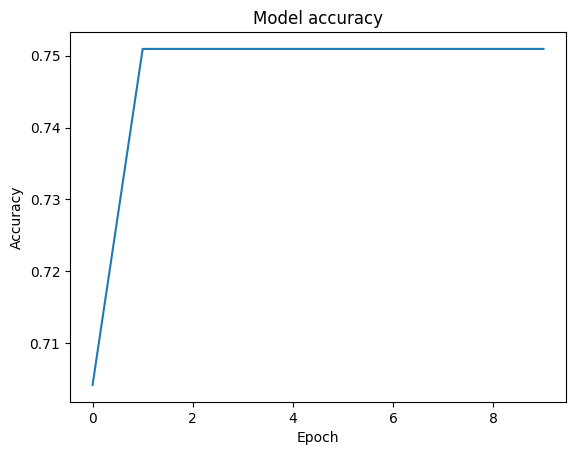

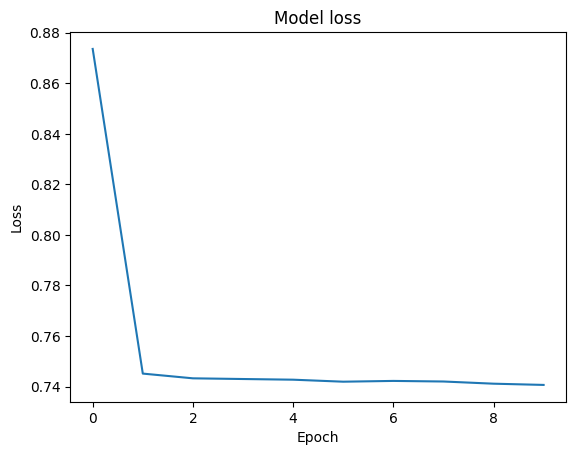

In [27]:
#Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

#Plot training loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [28]:
final_accuracy = history.history['accuracy'][-1]
print("Accuracy:", final_accuracy)

Accuracy: 0.7509531378746033


In [29]:
predictions = model.predict(X_test)
accuracy = final_accuracy

218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### We also calculate the F1 score to account for any imbalances present in the dataset

### User warnings below to be ignored as per the official documentation

In [40]:
from sklearn.metrics import accuracy_score, f1_score

# Function to calculate F1 score
def calculate_f1_score(y_true, y_pred):
    return f1_score(y_true, y_pred, average='weighted')

# Fit the NN model
model = create_model()  # Assuming create_model() function creates the NN model
model.fit(X_train, y_train, batch_size=best_batch_size, epochs=best_epoch, verbose=0)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
accuracy = accuracy_score(y_test, y_pred)
f1 = calculate_f1_score(y_test, y_pred)

# Add results to all_model_class dataframe
all_model_class.loc[len(all_model_class)] = ['NN' , accuracy, f1, total_time]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [41]:
all_model_class

,Model,Accuracy,F1 Score,Time
0,NN,0.74263,0.655992,0.036798


#### **Gradient boosting classifier**

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
def fit_gbc(X_train, X_test, y_train, y_test):
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)

    # Make predictions
    start_time = time.time()
    predictions = model.predict(X_test)
    total_time = time.time() - start_time

    return predictions, total_time

In [34]:
predictions, total_time = fit_gbc(X_train, X_test, y_train, y_test)
accuracy = accuracy_score(y_test, predictions)

### We also calculate the F1 score to account for any imbalances present in the dataset

In [42]:
from sklearn.metrics import accuracy_score, f1_score

# Function to calculate F1 score
def calculate_f1_score(y_true, y_pred):
    return f1_score(y_true, y_pred, average='weighted')

# Fit GBC model
predictions, total_time = fit_gbc(X_train, X_test, y_train, y_test)
accuracy = accuracy_score(y_test, predictions)
f1 = calculate_f1_score(y_test, predictions)

# Add results to all_model_class dataframe
all_model_class.loc[len(all_model_class)] = ['GBC' , accuracy, f1, total_time]
all_model_class

,Model,Accuracy,F1 Score,Time
0,NN,0.742630,0.655992,0.036798
1,GBC,0.751668,0.652482,0.038923


## Displaying the performance difference of these models using a bar graph. 
## Evidently, there is a very insignificant difference between the two.

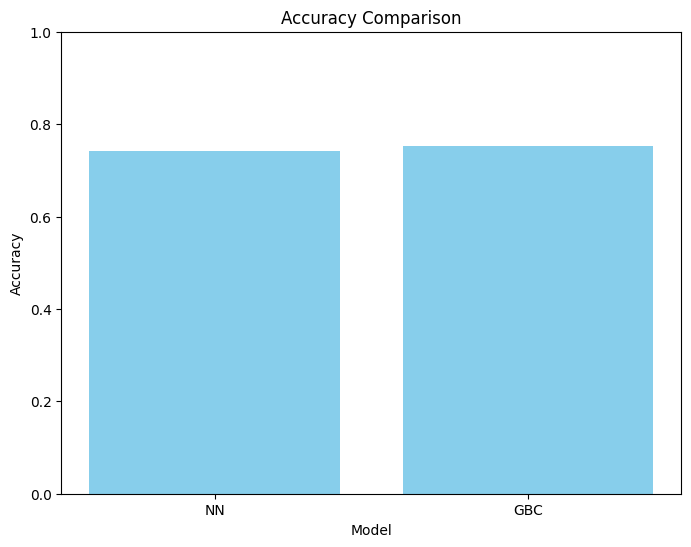

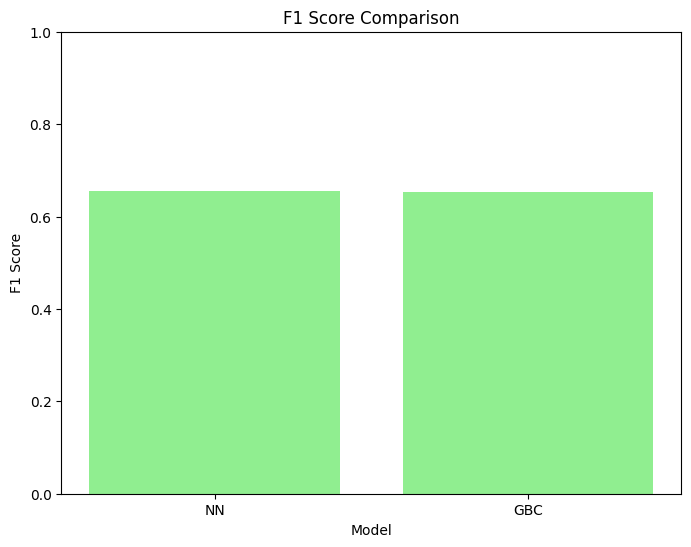

In [44]:
import matplotlib.pyplot as plt

# Data
models = all_model_class['Model']
accuracy = all_model_class['Accuracy']
f1_score = all_model_class['F1 Score']

# Bar plot for Accuracy
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color='skyblue')
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to ensure accuracy is within range [0, 1]
plt.show()

# Bar plot for F1 Score
plt.figure(figsize=(8, 6))
plt.bar(models, f1_score, color='lightgreen')
plt.title('F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # Set y-axis limit to ensure F1 score is within range [0, 1]
plt.show()


## Concluding results for regression 

In [36]:
#Here's what regression yielded
import pandas as pd

# Create a dictionary
data = {
    'Model': ['ARIMA', 'GBR', 'SVR', 'RFR', 'NN'],
    'MSE': [0.204821, 0.174813, 0.192384, 0.195781, 0.181915],
    'MAE': [0.378641, 0.307125, 0.293057, 0.322189, 0.311822],
    'Time': [0.637826, 0.037470, 4.063801, 0.260768, 15.746546]
}

df = pd.DataFrame(data)

df

,Model,MSE,MAE,Time
0,ARIMA,0.204821,0.378641,0.637826
1,GBR,0.174813,0.307125,0.037470
2,SVR,0.192384,0.293057,4.063801
3,RFR,0.195781,0.322189,0.260768
4,NN,0.181915,0.311822,15.746546


## Concluding results for classification

In [43]:
#Here's what classfication yielded
all_model_class
#it's important to note that we chose nn and gbc for the next part (ie classification) as they performed better than the other models while exploring regression

,Model,Accuracy,F1 Score,Time
0,NN,0.742630,0.655992,0.036798
1,GBC,0.751668,0.652482,0.038923


### Conclusions:

From the results provided for both regression and classification models, we can derive the following insights regarding the effectiveness of different methods for predicting earthquake magnitude based on geographical coordinates (latitude/longitude) and depth:

**Regression Models:**
* ARIMA, SVR, RFR, GBR: These models have been evaluated based on Mean Squared Error (MSE) and Mean Absolute Error (MAE). Lower values of MSE and MAE indicate better performance.
* Among these models GBR (Gradient Boosting Regressor) has the lowest MSE and second lowest MAE and lowest computational time, indicating that it performs the best in terms of minimizing prediction errors.
* Overall, based on the MSE and MAE metrics, GBR seems to be the most effective regression model for predicting earthquake magnitude.


**Classification Models:**
* NN, GBC: These models have been evaluated based on accuracy. Higher accuracy values indicate better performance.
* Both NN (Neural Network) and GBC (Gradient Boosting Classifier) achieve similar accuracy scores, with GBC outperforming NN by a small. However, both models have relatively low computational time, indicating that they are efficient in terms of processing speed.
* NN However has an insignificantly higher F1 score, when accounting to the imbalances in the dataset
* Overall, based on the accuracy metric, GBC seems to be the most effective classification model for predicting earthquake occurrences or classes based on geographical coordinates and depth.


**In conclusion, if the objective is to predict earthquake magnitude directly (regression task), the Gradient Boosting Regressor (GBR) appears to be the most effective model. However, if the objective is to classify earthquake occurrences (classification task), the Gradient Boosting Classifier (GBC) is the preferred choice based on the provided metrics. Both GBR and GBC demonstrate strong performance in terms of predictive accuracy, making them suitable candidates for predicting earthquake-related phenomena based on geographical coordinates and depth.**